In [18]:
import papermill as pm
import numpy as np
import matplotlib.pyplot as plt

color_rate = "#d55e00"
color_drate = 'darkblue' #"#0072b2"
color_s1s2 = 'limegreen' #"#009e73"

In [2]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Email configuration
sender_email = 'martindelosrios13@gmail.com'
app_password = 'ukgl cvyy glqk woki'  # Use the app password you generated
recipient_email = 'martindelosrios13@gmail.com'
subject = 'Termino'
message = 'Termino de correr'

# Connect to the SMTP server
smtp_server = 'smtp.gmail.com'
smtp_port = 587



def email(message = 'termino'):
    # Create a MIMEText object to represent the email message
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient_email
    msg['Subject'] = subject
    msg.attach(MIMEText(message, 'plain'))

    server = smtplib.SMTP(smtp_server, smtp_port)
    server.starttls()
    # Log in to your email account with the app password
    server.login(sender_email, app_password)
    
    # Send the email
    server.sendmail(sender_email, recipient_email, msg.as_string())
    
    # Close the connection
    server.quit()
    return None

In [3]:
pm.inspect_notebook('O4_analysis_lessData.ipynb')

{'nobs_new': {'name': 'nobs_new',
  'inferred_type_name': 'None',
  'default': '1000',
  'help': ''}}

In [30]:
for nobs_new in [1000, 2000, 3000, 4000, 5000,
                 6000, 7000, 8000, 9000, 10000,
                 11000, 12000, 13000, 14000, 15000,
                 20000]:
    print('training for ' + str(nobs_new))
    for i in np.arange(5):
        pm.execute_notebook(
           'O4_analysis_lessData.ipynb',
           #'O1_analysis_LessData-Copy1.ipynb',
           'test1.ipynb',
           parameters=dict(nobs_new = nobs_new)
        )
    
    
    email('Termino el entramiento para ' + str(nobs_new))

training for 1000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [02:45<00:00,  2.07s/cell]


training for 2000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [06:07<00:00,  4.59s/cell]


training for 3000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [07:12<00:00,  5.40s/cell]


training for 4000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [10:05<00:00,  7.57s/cell]


training for 5000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [14:20<00:00, 10.75s/cell]


training for 6000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [14:00<00:00, 10.50s/cell]


training for 7000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [18:45<00:00, 14.07s/cell]


training for 8000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [22:00<00:00, 16.50s/cell]


training for 9000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [21:13<00:00, 15.92s/cell]


training for 10000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [24:48<00:00, 18.61s/cell]


training for 11000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [34:23<00:00, 25.79s/cell]


training for 12000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [32:04<00:00, 24.06s/cell]


training for 13000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [43:39<00:00, 32.75s/cell]


training for 14000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [32:19<00:00, 24.24s/cell]


training for 15000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [23:33<00:00, 17.67s/cell]


training for 20000


Executing: 100%|███████████████████████████████████████████████████████| 80/80 [46:41<00:00, 35.02s/cell]


In [31]:
rateLoss = np.zeros(16)
drateLoss = np.zeros(16)
s1s2Loss = np.zeros(16)
rateStd = np.zeros(16)
drateStd = np.zeros(16)
s1s2Std = np.zeros(16)

nobs = [1000, 2000, 3000, 4000, 5000,
        6000, 7000, 8000, 9000, 10000,
        11000, 12000, 13000, 14000, 15000,
        20000]
for i, ii in enumerate(nobs):
    data = np.load('O4_valLoss_nobs_' + str(ii) + '.npy')
    mean = np.mean(data, axis = 1)
    std = np.std(data, axis = 1)
    rateLoss[i] = mean[0]
    drateLoss[i] = mean[1]
    s1s2Loss[i] = mean[2]
    rateStd[i] = std[0]
    drateStd[i] = std[1]
    s1s2Std[i] = std[2]

In [34]:
np.load('O4_valLoss_nobs_15000.npy')

array([[-1.21182507, -1.23198427, -1.14632752, -1.17709224, -1.10045589],
       [-1.76158027, -1.90953539, -1.71530611, -1.84590638, -1.70223237],
       [-2.05559281, -1.89786287, -1.86846969, -2.11263718, -0.92866719]])

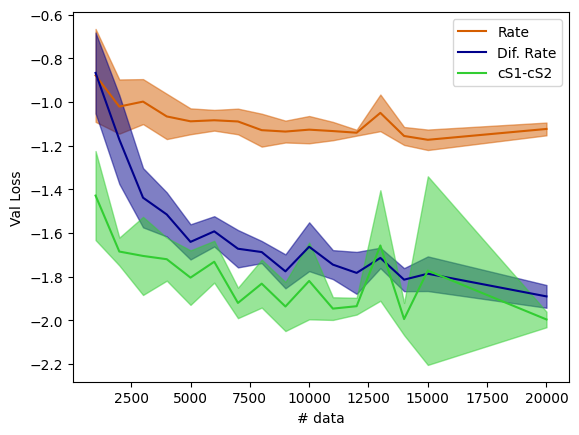

In [35]:
plt.plot(nobs, rateLoss, color = color_rate, label = 'Rate')
plt.fill_between(nobs, (rateLoss - rateStd), (rateLoss + rateStd), color = color_rate, alpha = 0.5)
plt.plot(nobs, drateLoss, color = color_drate, label = 'Dif. Rate')
plt.fill_between(nobs, (drateLoss - drateStd), (drateLoss + drateStd), color = color_drate, alpha = 0.5)
plt.plot(nobs, s1s2Loss, color = color_s1s2, label = 'cS1-cS2')
plt.fill_between(nobs, (s1s2Loss - s1s2Std), (s1s2Loss + s1s2Std), color = color_s1s2, alpha = 0.5)

plt.legend()
plt.ylabel('Val Loss')
plt.xlabel('# data')
plt.savefig('../graph/O4_datavsValloss.pdf')